<a href="https://colab.research.google.com/github/DhanyaReji13/Python-project/blob/main/FedEx_Logistics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - FedEx Logistics Performance Analysis

##### **Project Type**    - **Exploratory Data Analysis**
##### **Led By**          - **S.Dhanya Das**


# **Project Summary -**


### Optimizing FedEx Logistics Through Data Analysis
In today’s fast-paced, globally connected market, FedEx Logistics plays a pivotal role in managing supply chains across various industries and regions. With the rapid growth of eCommerce and global distribution networks, maintaining efficient logistics operations is critical to staying competitive. This project focuses on analyzing data from FedEx Logistics to uncover insights that can optimize shipment processes, minimize costs, and enhance customer satisfaction. The dataset contains information on shipment modes, countries, vendors, line item values, weights, freight costs, delivery delays, and more, allowing for a comprehensive analysis of the company’s logistics
performanctisfaction.


# **Business Objective**


**The dataset aims to optimize FedEx Logistics' global supply chain by providing detailed insights into purchase orders, shipment methods, vendor agreements, and delivery schedules. With the rise of eCommerce and increasing global distribution demands, analyzing this data will help identify bottlenecks, minimize freight costs, and enhance delivery efficiency. The goal is to streamline operations, improve customer satisfaction, and maintain a competitive edge by ensuring timely deliveries and cost-effective logistics management.**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries for analysis:
# Pandas: For data manipulation, cleaning, and analysis.
# NumPy: For efficient numerical computations and array handling.
# Matplotlib: For creating basic static visualizations like line and bar charts.
# Seaborn: For advanced statistical visualizations and better aesthetics.
# Plotly: For interactive and dynamic data visualizations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/SCMS_Delivery_History_Dataset (1).csv"

Mounted at /content/drive


### Dataset Loading

In [ ]:
#loading FedEx logistics dataset and assigning to a varible data.
data= pd.read_csv(file_path)
pd.set_option('display.max_columns',None)#Display all the columns of the data frame



### Dataset First View

In [ ]:
#Displaying the first five rows of data
fed_df = pd.DataFrame(data)
fed_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count:.shape method displays the number of rows and columns
print(f"No of rows : {fed_df.shape[0]}")
print(f"No of columns : {fed_df.shape[1]}")

No of rows : 10324
No of columns : 33


### Dataset Information

In [ ]:
# Dataset Info : .info gives the information (null values and type of data) about each column
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count : Checking for a duplicate values in ID column
fed_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count:Checking for number of missing values in each columns
fed_df.isnull().sum().sort_values(ascending=False)


,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
Molecule/Test Type,0
Brand,0
Dosage Form,0
Unit of Measure (Per Pack),0
Line Item Quantity,0
Line Item Value,0
Vendor,0


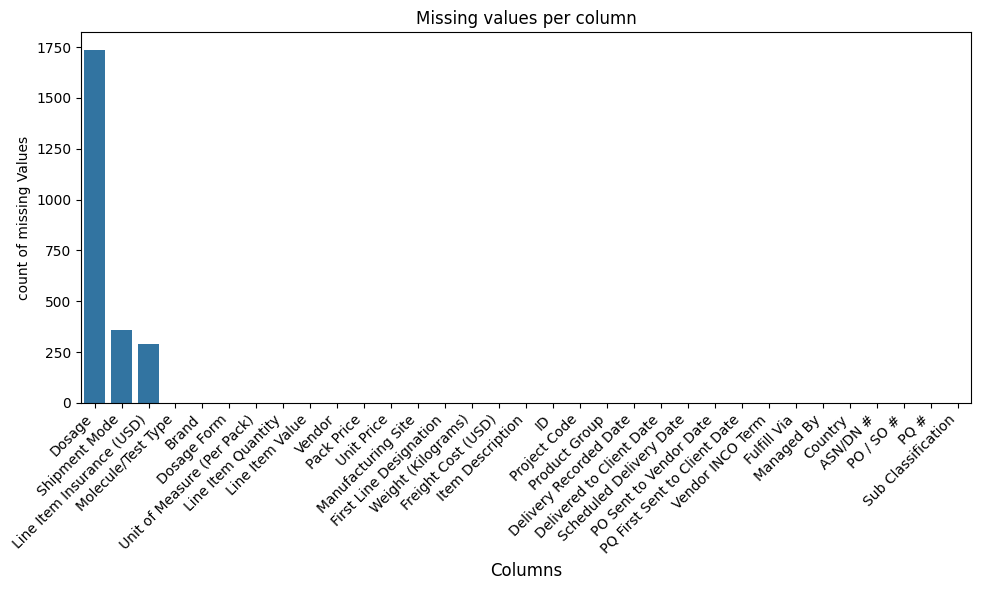

In [ ]:
# Visualizing the missing values :Using Seaborn

missing_value = fed_df.isnull().sum().sort_values(ascending= False)
columns= missing_value.index

# Plot the missing values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=missing_value,x=columns)
plt.title("Missing values per column",fontsize = 12)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("count of missing Values", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### **Initial Overview of the data**

Fedex dataset consists of 10,324 entries and 33 columns, including various fields related to procurement and shipment details, such as IDs, project codes, purchase orders, and shipping numbers. It also captures logistical details like shipment modes, vendor terms, and delivery dates. Key numerical fields include line item quantities, prices, and freight costs. Some columns contain missing data, such as "Shipment Mode","Line Item Insurance (USD)" and "Dosage," while most others are complete. Additionally, certain fields like "Weight (Kilograms)" and "Freight Cost (USD)" are stored as objects but may need conversion for numerical analysis. Overall, it’s a detailed dataset suited for procurement and supply chain analysis.

## ***2. Understanding Your Variables***

In [ ]:
fed_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
fed_df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Check Unique Values for each variable.

In [ ]:
for column in fed_df.columns:
    print(f"{column} : {fed_df[column].nunique()}")

ID : 10324
Project Code : 142
PQ # : 1237
PO / SO # : 6233
ASN/DN # : 7030
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 4
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Item Description : 184
Molecule/Test Type : 86
Brand : 48
Dosage : 54
Dosage Form : 17
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6722


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Preparing the dataset for analysis
#fed_ex is the subset of the dataset provided by the FedEx Logistics
fed_ex = fed_df.loc[::,['Country',
       'Managed By',
       'Fulfill Via',
       'Shipment Mode',
       'Scheduled Delivery Date',
       'Delivered to Client Date',
       'Delivery Recorded Date',
       'Vendor',
       'Line Item Quantity',
       'Line Item Value',
       'Manufacturing Site',
       'Weight (Kilograms)',
       'Freight Cost (USD)',
       'Line Item Insurance (USD)']]

print(fed_ex.dtypes)

Country                       object
Managed By                    object
Fulfill Via                   object
Shipment Mode                 object
Scheduled Delivery Date       object
Delivered to Client Date      object
Delivery Recorded Date        object
Vendor                        object
Line Item Quantity             int64
Line Item Value              float64
Manufacturing Site            object
Weight (Kilograms)            object
Freight Cost (USD)            object
Line Item Insurance (USD)    float64
dtype: object


In [ ]:
fed_ex.describe()

,Line Item Quantity,Line Item Value,Line Item Insurance (USD)
count,10324.000000,1.032400e+04,10037.000000
mean,18332.534870,1.576506e+05,240.117626
std,40035.302961,3.452921e+05,500.190568
min,1.000000,0.000000e+00,0.000000
25%,408.000000,4.314593e+03,6.510000
50%,3000.000000,3.047147e+04,47.040000
75%,17039.750000,1.664471e+05,252.400000
max,619999.000000,5.951990e+06,7708.440000


In [ ]:
#Dealing with the missing values in Shipment Mode column by imputing with the mode.

mode_shipment = fed_ex['Shipment Mode'].mode()[0]
fed_ex['Shipment Mode'] = fed_ex['Shipment Mode'].fillna(mode_shipment)

#Dealing with the missing values in Line Item Insurance(USD) column with 0.

fed_ex['Line Item Insurance (USD)'] = fed_ex['Line Item Insurance (USD)'].fillna(0)

#dropping the duplicted rows if any.
fed_ex.drop_duplicates(inplace = True)

#Dealing with date columns : Converting them to datetime and coerce errors
date_columns = [
       'Scheduled Delivery Date',
       'Delivered to Client Date',
       'Delivery Recorded Date']
for column in date_columns:
    fed_ex[column] = pd.to_datetime(fed_ex[column],errors = 'coerce')

#Dealing with datatype errors in numerice column
numeric_col = ['Line Item Quantity','Line Item Value', 'Weight (Kilograms)',
               'Freight Cost (USD)', 'Line Item Insurance (USD)']
for column in numeric_col:
    fed_ex[column] = pd.to_numeric(fed_ex[column],errors = 'coerce')

#Normalizing the country column in the data set
fed_ex['Country'] = fed_ex['Country'].str.strip().str.upper()

#Adding an new colum 'Delay_day' :The number of days delayed in shipment
fed_ex['Delay_day']= (fed_ex['Delivered to Client Date']-fed_ex['Scheduled Delivery Date']).dt.days

#Displaying the information og the fed_ex
fed_ex.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10265 entries, 0 to 10323
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Country                    10265 non-null  object        
 1   Managed By                 10265 non-null  object        
 2   Fulfill Via                10265 non-null  object        
 3   Shipment Mode              10265 non-null  object        
 4   Scheduled Delivery Date    10265 non-null  datetime64[ns]
 5   Delivered to Client Date   10265 non-null  datetime64[ns]
 6   Delivery Recorded Date     10265 non-null  datetime64[ns]
 7   Vendor                     10265 non-null  object        
 8   Line Item Quantity         10265 non-null  int64         
 9   Line Item Value            10265 non-null  float64       
 10  Manufacturing Site         10265 non-null  object        
 11  Weight (Kilograms)         6345 non-null   float64       
 12  Freight C

In [ ]:
#Dropping the missing values
fed_ex.dropna(subset=['Freight Cost (USD)'],inplace=True)

#Dealing the missing values in the weight columns with mean values
mean_weight = fed_ex['Weight (Kilograms)'].mean()
fed_ex['Weight (Kilograms)'] = fed_ex['Weight (Kilograms)'].fillna(mean_weight)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Analysis

#### **1.Count of Shipments by Country**

This analysis revealed the distribution of shipments across various countries, helping identify key markets. Countries with the highest shipment volumes represent regions where FedEx may need to allocate more resources to maintain operational efficiency.

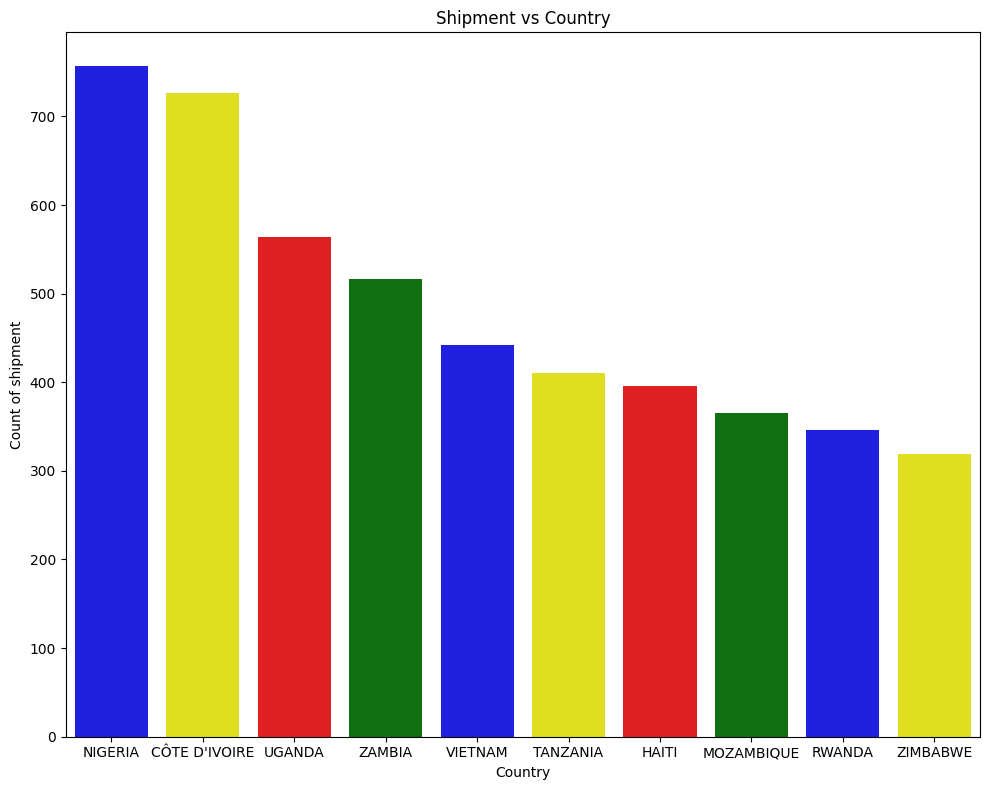

In [ ]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,1,figsize = (10,8))
palette = ['blue', 'yellow', 'red','green']
sns.countplot(x = 'Country', order=fed_ex['Country'].value_counts().nlargest(10).index,data = fed_ex,palette = palette,ax=ax)
plt.title("Shipment vs Country")
plt.xlabel("Country")
plt.ylabel("Count of shipment")
plt.tight_layout()
plt.show()

**Based on the shipment count, it's evident that
Nigeria and Cote d Ivoire are leading in shipment, and at least are Zimbabwe and Rwanda
which also see significant shipment activity.
Vietnam's position could be due to its role as a manufacturing hub in Southeast Asia, while Zimbabwe's
shipments might be related to its exports in mining,
agriculture, or other key commodities.This trend indicates a diverse global trade landscape with strong regional markets.**

#### **2.Distribuition of shipment mode**

Analyzing shipment modes (e.g., Air, Sea, or Ground) showed that air shipments are more frequently used , while sea shipments were less common due to their longer delivery times. This insight is crucial for balancing cost and speed.

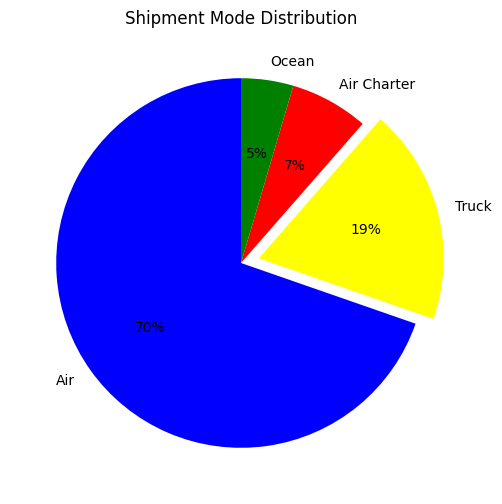

In [ ]:
# Count shipment modes
count_shipment_mode = fed_ex['Shipment Mode'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
labels = count_shipment_mode.index  # Categories for the pie chart
explode = (0, 0.1, 0, 0)
palette = ['blue', 'yellow', 'red','green']

# Plotting the pie chart
ax.pie(
    count_shipment_mode.values,  # Values for the pie chart
    labels=labels,
    explode=explode,
    autopct="%.0f%%",
    startangle=90,
    colors = palette
)

# Add a title
plt.title("Shipment Mode Distribution")

# Display the chart
plt.show()


**It is clear that more than 70% of consignments are delivered by air, indicating a strong preference for this mode of transportation, likely due to its speed and efficiency. Following air transport, trucking accounts for 19% of the deliveries, suggesting that it plays a significant role in domestic distribution or shorter regional routes. Ocean freight, at 5%, is the least utilized method, which may reflect longer delivery times and logistical challenges associated with shipping by sea. Additionally, air charter services make up 7% of the total, which may be used for specialized shipments requiring rapid delivery. This distribution highlights the varying needs and priorities in logistics,with air transport being the dominant choice for time-sensitive consignments.**

#### **3.Distribuition of Freight Cost(USD)**

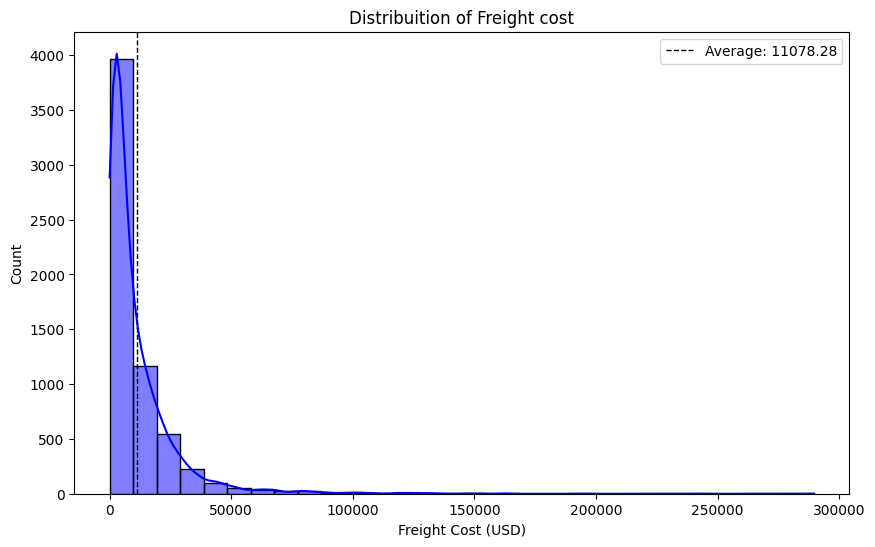

<Figure size 640x480 with 0 Axes>

In [ ]:
#plotting the distribuition of freight cost
#average of the freight cost
average_freight_cost=fed_ex['Freight Cost (USD)'].mean()

fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.histplot(x='Freight Cost (USD)',data = fed_ex,ax=ax,kde=True,bins=30,color='blue')
ax.axvline(average_freight_cost, color='black', linestyle='--', linewidth=1, label=f'Average: {average_freight_cost:.2f}')#displaying the average line
ax.legend()
plt.title("Distribuition of Freight cost")
plt.show()
plt.tight_layout()


**The analysis reveals that the average freight cost is 11,076.78 dollor, with a right-skewed distribution indicating that most shipments are below this average. While lower-cost consignments are more frequent, there are a few high-value shipments (outliers) that significantly influence the average. Very few shipments exceed $50,000, suggesting that high-cost logistics are less common. This insight can help optimize logistics strategies by identifying the factors driving higher costs and exploring ways to reduce them.**

#### **4.Distribuition of Line Item Quantity**

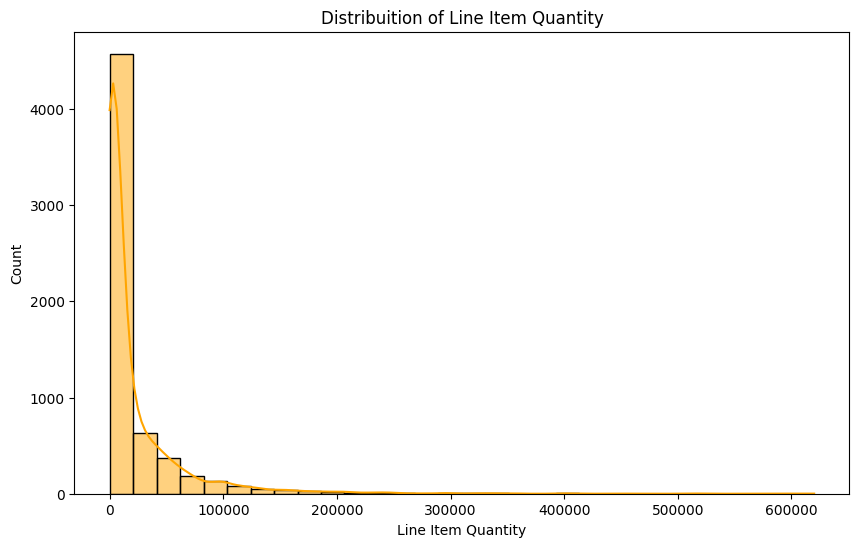

<Figure size 640x480 with 0 Axes>

In [ ]:

#plot showing the distribuition of Line Item Quantity
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.histplot(x='Line Item Quantity',data = fed_ex,ax=ax,kde=True,bins=30,color='orange')

plt.title("Distribuition of Line Item Quantity")
plt.show()
plt.tight_layout()



In [ ]:
fed_ex['Line Item Quantity'].value_counts().nlargest(5)

,count
Line Item Quantity,
10000,71
20000,55
1000,53
2000,47
4000,44


**The distribuition of the most common quantites are:**

10000 : 71 counts,
20000 : 55 counts,
1000  : 53 counts,
2000  : 47 counts,
4000  : 44 counts

**Very few orders have more than 50000 quantites. The distribuition is right skewed showing possibility of outliers.**

#### **5.Distribuition of Weight (kg)**

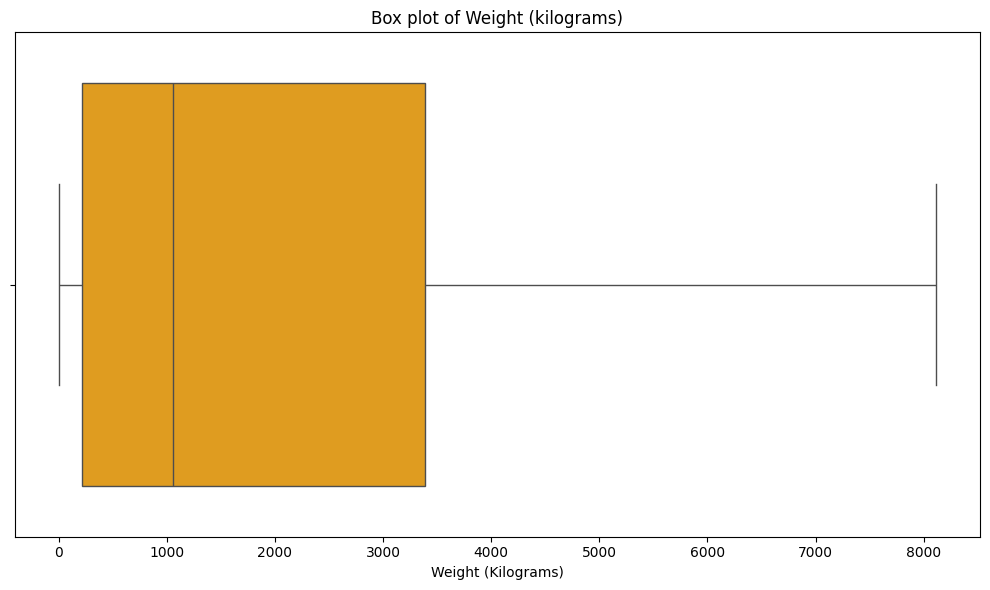

In [ ]:
#plotdisplaying the min,max,mean of the weight columns
fig,ax=plt.subplots(1,1,figsize=(10,6))
sns.boxplot(x='Weight (Kilograms)',data = fed_ex,color='orange',ax=ax,showfliers=False)
plt.title("Box plot of Weight (kilograms)")
plt.tight_layout()
plt.show()

**This box plot depicts weight column has lack of data or very little variability of data.This suggests that the majority of shipments fall within a narrow weight range or that there are no shipments with significantly high or low weights. Without distinct quartiles or outliers visible, it is challenging to assess the overall distribution and characteristics of the shipment weights. This might warrant further investigation into the dataset to determine if any data points are missing or if the shipments are consistently uniform in weight.**

#### **6.Vendors with highest orders**

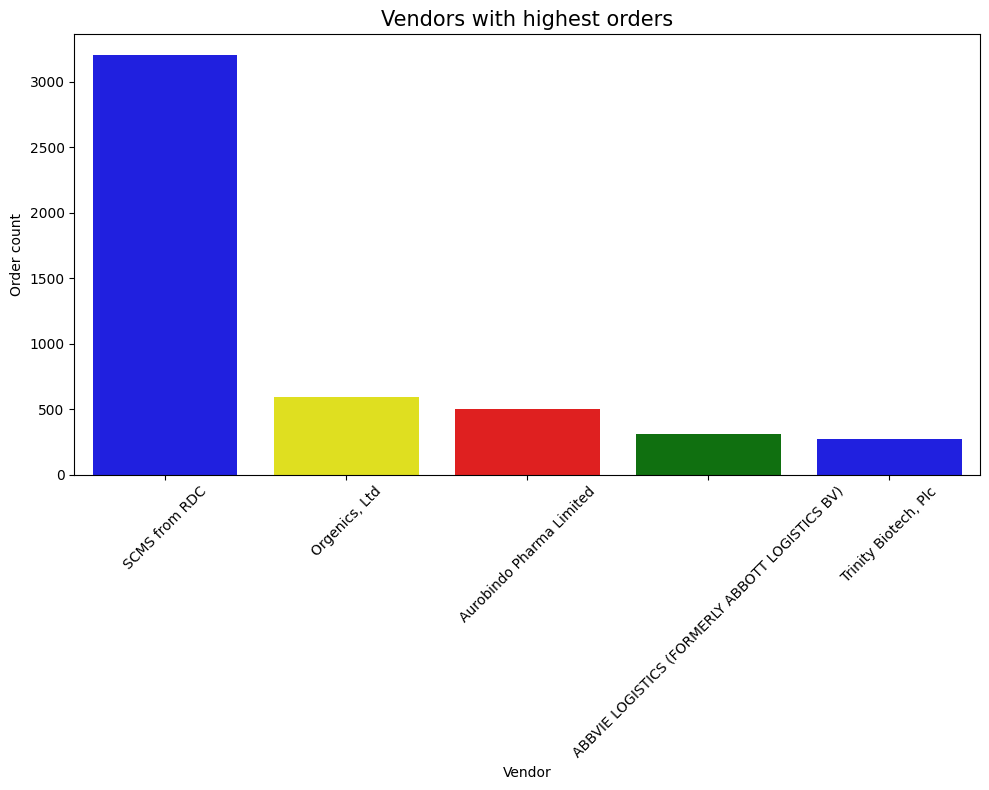

In [ ]:
#plot displys the top 5 vendors based on the count of orders
top5_vendor = fed_ex['Vendor'].value_counts().nlargest(5) #top 5 vendors with hihgest orders

fig,ax = plt.subplots(1,1,figsize=(10,8))
palette = ['blue', 'yellow', 'red','green']
sns.countplot(x='Vendor',order = top5_vendor.index,data=fed_ex,palette = palette,ax=ax)
plt.title("Vendors with highest orders",fontsize=15)
plt.ylabel("Order count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The bar charts indicates the top 5 vendors based on their number of orders.It is clear that SCMS from Rdc vendor stands out with highest order count  (< 3000) followed by Orgenics.Ltd,S.Buys Wholesaler and Aurobindo Pharma Limited with a order of less than 1000 . This depicts that SCMS from RDc plays a majority role in the shipment procurement and all other vendors are very less active in comparison.**

### **Bi-Variate Analysis**

#### **1.Average weight by shipment mode**

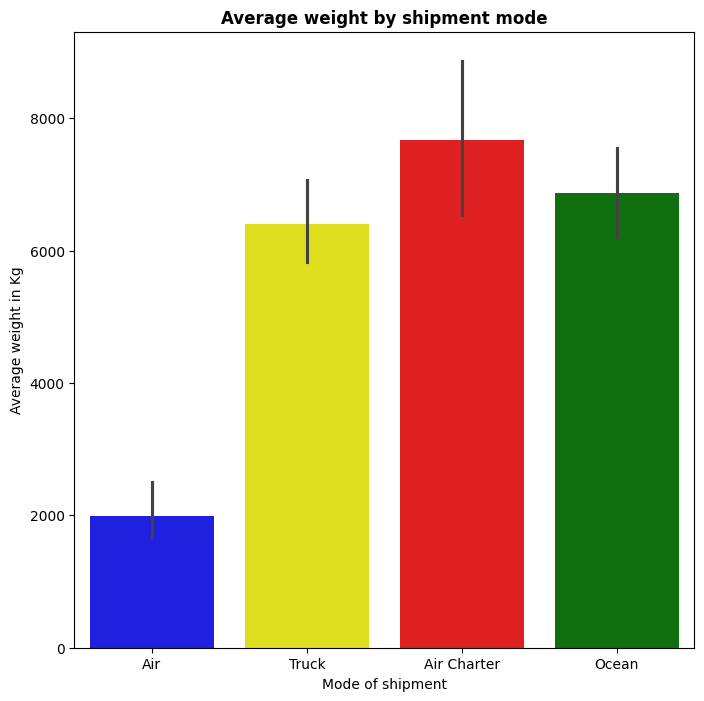

In [ ]:
#plot to display how weight of the orders are associated with mode of shipment

fig,ax = plt.subplots(1,1,figsize = (8,8))
palette = ['blue', 'yellow', 'red','green']
sns.barplot(data=fed_ex,x='Shipment Mode',y='Weight (Kilograms)',estimator = 'mean',palette = palette)
plt.title("Average weight by shipment mode",weight='bold')
plt.xlabel("Mode of shipment")
plt.ylabel("Average weight in Kg")
plt.show()

**The bar chart depicts that conventional air transports handles relatively lighter shipments, with an average weight of 2000 kg, while truck transport handles heavy shipments of more than 6000 kg. The heavier shipment are mainly handled by Air charter transport (with an average shipment weight of 7500 kg) and ocean transport (with an average weigh of 7000 kg).This suggests that air shipment is used for urgent requirement while truck and ocean transport are preffered for bulquier shipments.**

#### **2.Delivery delays vs shipment mode**

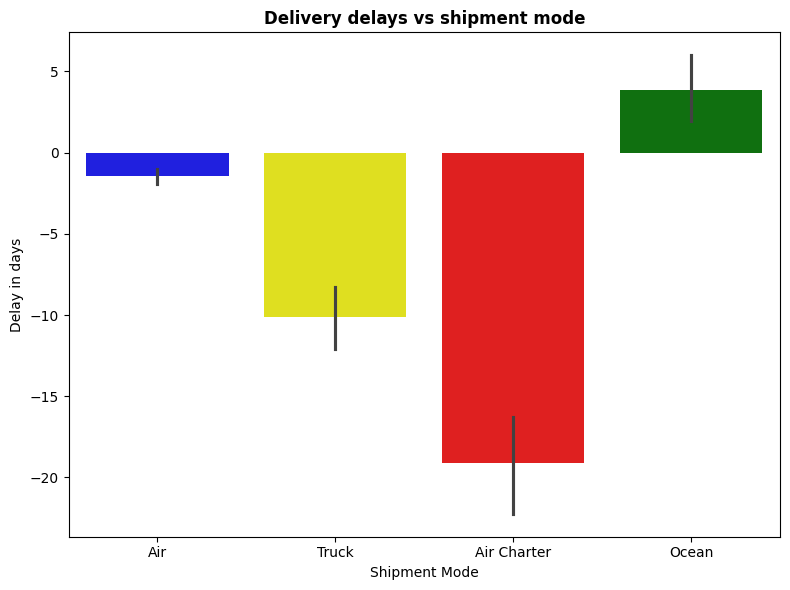

In [ ]:
delay_day = (fed_ex['Delivered to Client Date']-fed_ex['Scheduled Delivery Date']).dt.days
palette = ['blue', 'yellow', 'red','green']
fig,ax = plt.subplots(1,1,figsize = (8,6))
sns.barplot(data = fed_ex,x='Shipment Mode',y=delay_day,palette=palette)
plt.title("Delivery delays vs shipment mode",weight='bold')
plt.ylabel("Delay in days")
plt.tight_layout()
plt.show()


**This bar plot illustrates the relationship between shipment modes and delays in delivery dates. It is evident that the Air Charter mode is the least punctual, with delivery delays exceeding 20 days. Following this, Truck deliveries show delays of approximately 10 to 12 days. Ocean Transport is relatively reliable, with delays of less than 5 days. In contrast, Air Transport is the most reliable mode, with minimal delays in delivery.**

**In conclusion, based on timeliness, Air Charter is the least reliable shipment mode, while conventional Air Transport is the most reliable, followed by Truck.**

#### **3.Average Freight Cost Vs Shipment Mode**

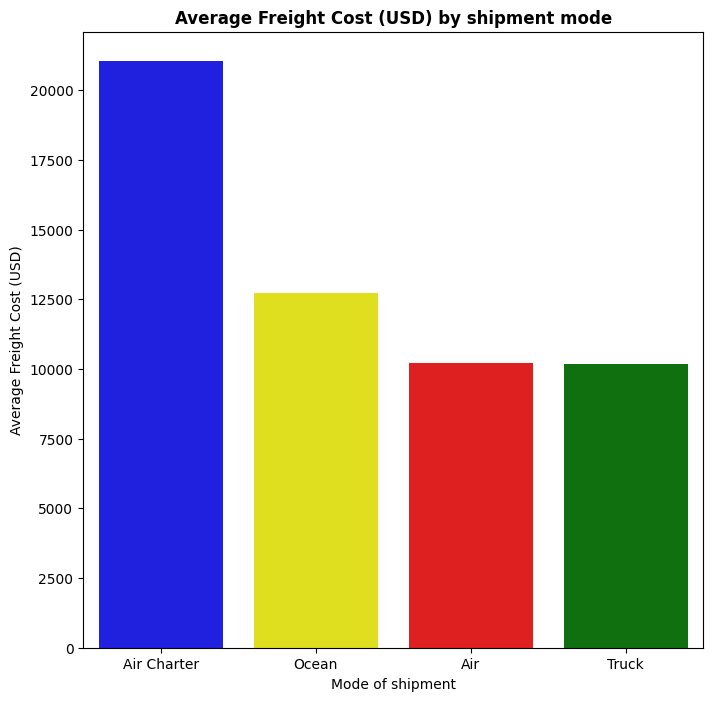

In [ ]:
#plot to display how shipment mode of the orders are associated with freight cost
sorted_fed_ex= fed_ex.groupby("Shipment Mode")["Freight Cost (USD)"].mean().sort_values(ascending=False).reset_index()
fig,ax = plt.subplots(1,1,figsize = (8,8))
palette = ['blue', 'yellow', 'red','green']
sns.barplot(data=sorted_fed_ex,x='Shipment Mode',y='Freight Cost (USD)',estimator = 'mean',palette = palette)
plt.title("Average Freight Cost (USD) by shipment mode",weight='bold')
plt.xlabel("Mode of shipment")
plt.ylabel("Average Freight Cost (USD)")
plt.show()

**The bar plot illustrates the relationship between freight cost and shipment modes. Air Charter is the most expensive option, while Conventional Air and Truck modes have comparable freight costs. Ocean shipment costs approximately 12,000. In conclusion, Conventional Air and Truck modes are more cost-effective and reliable transportation options.**

#### **4.Seasonal Trends in Shipment**

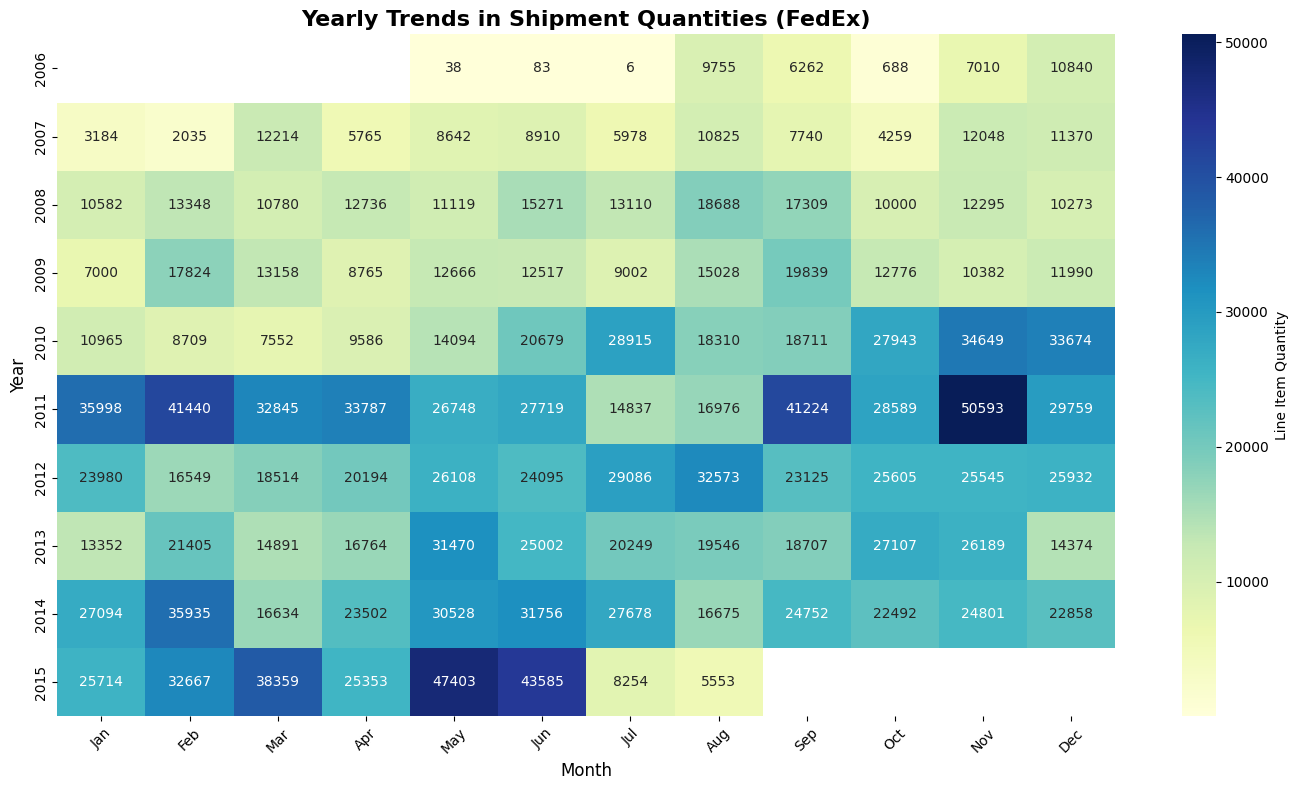

In [ ]:
# Extracting year and month
fed_ex['Year'] = fed_ex['Scheduled Delivery Date'].dt.year
fed_ex['Month'] = fed_ex['Scheduled Delivery Date'].dt.month

# Creating a pivot table for shipments by year and month
heatmap_data = fed_ex.pivot_table(index='Year', columns='Month', values='Line Item Quantity', aggfunc='mean')

# Replacing month numbers with names
heatmap_data.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Line Item Quantity'}
)
plt.title('Yearly Trends in Shipment Quantities (FedEx)', fontsize=16, weight='bold')  # Clear and descriptive title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()




**The heatmap illustrates annual shipment trends based on Line Item Quantities, revealing notable seasonal fluctuations. From 2006 to 2011, there's a significant increase in shipments, followed by a decline in 2012 and 2013. Shipments show modest recovery in 2014, continuing through June 2015. However, a noticeable downturn begins in July 2015, possibly indicating operational slowdowns or shifting market conditions. These patterns suggest that shipment volumes are influenced by seasonal factors or business cycles.**

#### **5. Line Item Value Across Different Shipment Modes**



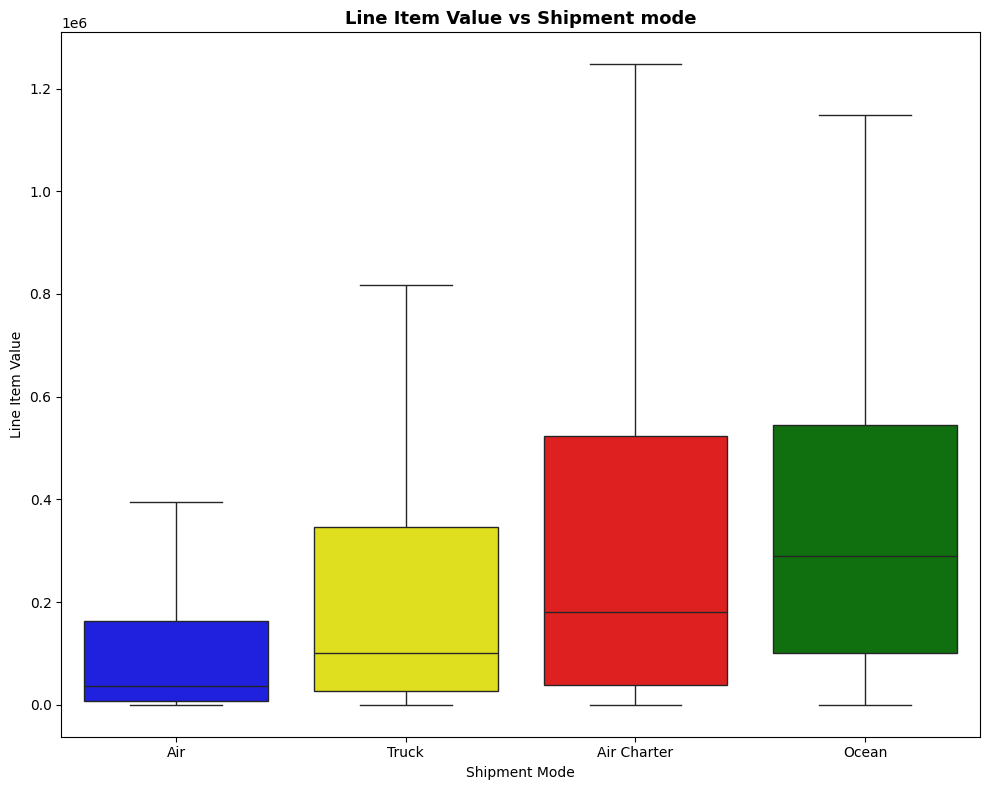

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
palette = ['blue', 'yellow', 'red','green']

sns.boxplot(x = 'Shipment Mode' , y = 'Line Item Value',data = fed_ex,palette = palette,showfliers = False)
plt.title('Line Item Value vs Shipment mode',weight='bold',fontsize=13)
plt.tight_layout()
plt.show()

**The box plot depicts the distribuition of the Item values in different Shipment Mode.It shows that Ocean shipment mode has the highest number of items shipped, followed by Truck and Air Charter.The interquartile range (IQR) for Air Shipment mode is the smallest, indicating a more consistent number of items shipped compared to other modes. The outlier for Other suggests a significantly higher number of items shipped in one or more months. Overall, the plot highlights the variability in item shipments across different modes.**

#### **6.Top Countries based on Freight Cost**

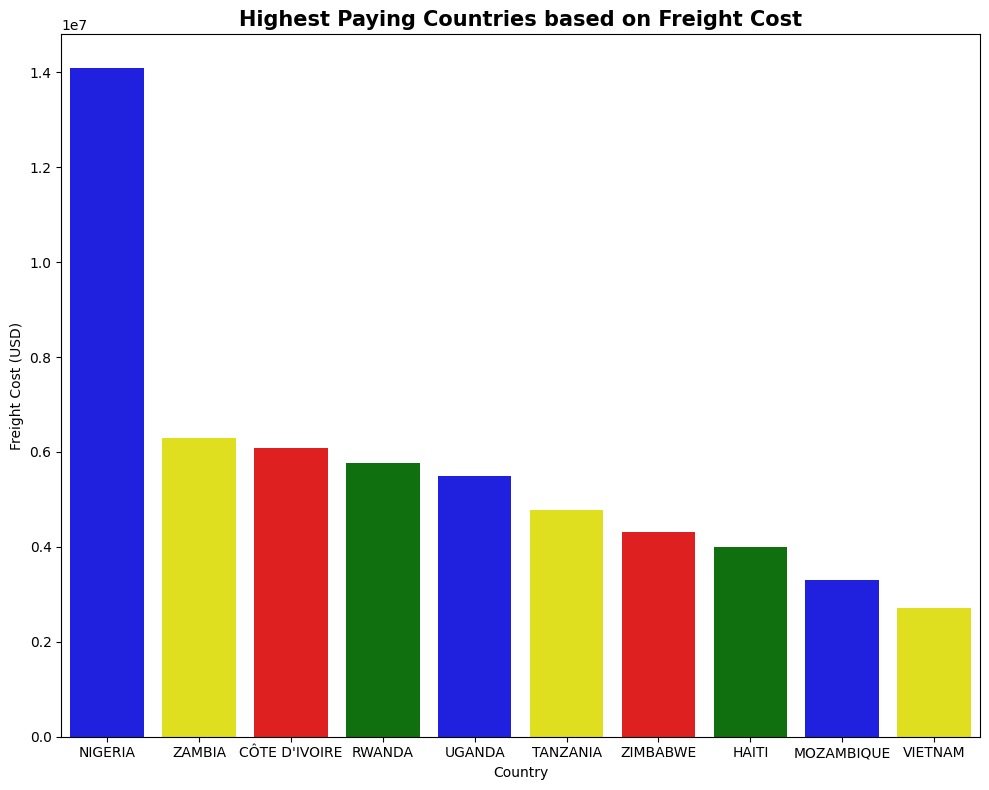

In [ ]:
top_10_countries = fed_ex.groupby('Country')['Freight Cost (USD)'].sum().nlargest(10).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Bar plot of top 10 countries by freight cost
sns.barplot(x='Country', y='Freight Cost (USD)', data=top_10_countries, palette=palette, ax=ax)
plt.title('Highest Paying Countries based on Freight Cost',weight='bold',fontsize=15)
# Tight layout for better spacing
plt.tight_layout()
plt.show()


**The bar plot highlights the top 10 countries based on their freight costs, clearly showing that Nigeria stands out as the top country with an exceptionally high freight cost exceeding 14,000 USD. In contrast, all other countries have freight costs below 7,000 USD. Notably, Nigeria also ranks highest in terms of the number of orders. This calls for a deeper analysis to uncover the factors contributing to the significant increase in freight costs for Nigeria.**

#### **7.Delay in delivery vs method of shipment fulfillment**

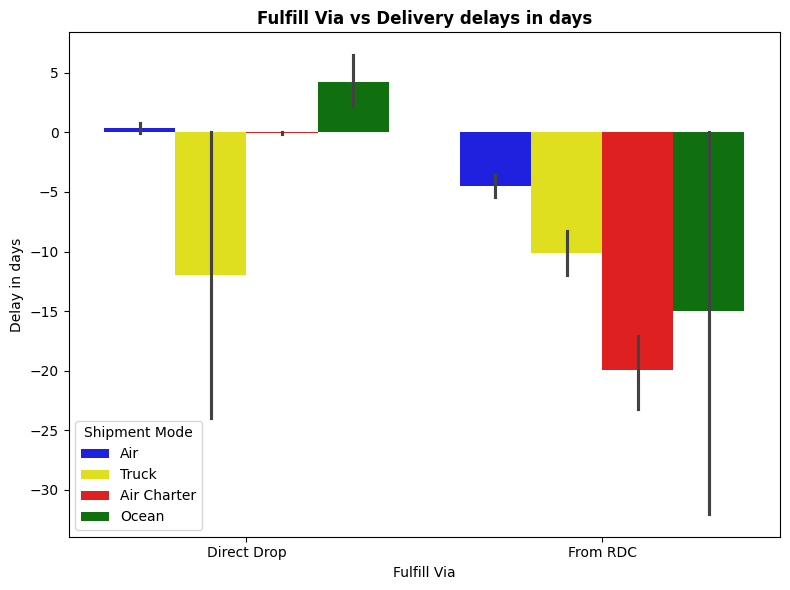

In [ ]:
palette = ['blue', 'yellow', 'red','green']
fig,ax = plt.subplots(1,1,figsize = (8,6))
sns.barplot(data = fed_ex,x='Fulfill Via',y='Delay_day',palette=palette,hue='Shipment Mode')
plt.title("Fulfill Via vs Delivery delays in days",weight='bold')
plt.ylabel("Delay in days")
plt.tight_layout()
plt.show()

**The boxplot illustrates the impact of the method of fulfillment and delivery delays. It is evident that Direct Drop is more reliable, as almost all orders are delivered on time. In contrast, deliveries from RDC are consistently delayed, regardless of the mode of shipment. However, in the case of Direct Drop, shipments via trucks exhibit some delayed patterns.**

**This suggests that minimizing delays in Direct Drop shipments can enhance FedEx's customer satisfaction.**

#### **8.Freight Cost Vs Weight(Kgs)**


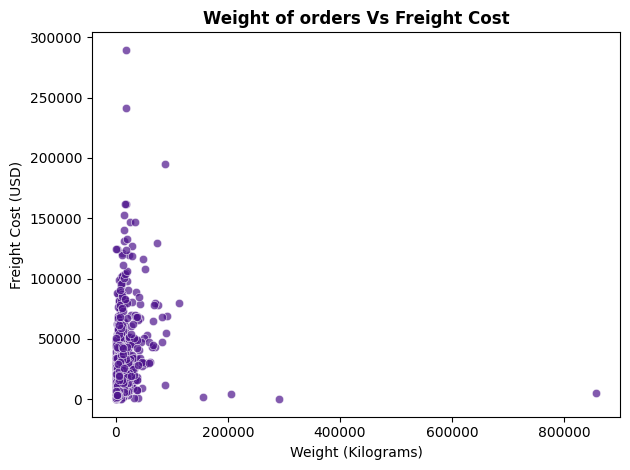

In [ ]:
sns.scatterplot(x='Weight (Kilograms)',y='Freight Cost (USD)',data=fed_ex,alpha = 0.7,color = '#4d148c')

plt.title("Weight of orders Vs Freight Cost",weight='bold')
plt.tight_layout()
plt.show()

**The scatter plot illustrates the relationship between
freight cost and weight for a set of shipments.
The general trend is that as the weight of a shipment increases,
so does the freight cost.
However, there is also a degree of variability around this trend, as evidenced by
the scatter of the data points. This suggests that factors other than weight,
such as distance, shipment mode, or item type, may also influence freight costs.
Additionally, the plot reveals a few potential outliers,
which could be due to unusual shipments or errors in the data.
Overall, the scatter plot provides a visual representation of
the relationship between freight cost and weight,
highlighting the general trend while also indicating the
presence of additional factors that may affect pricing.**

### **Multivariate Analysis**

#### **1.Freight cost by Top 10 Countries,Shipment Mode,Weight**

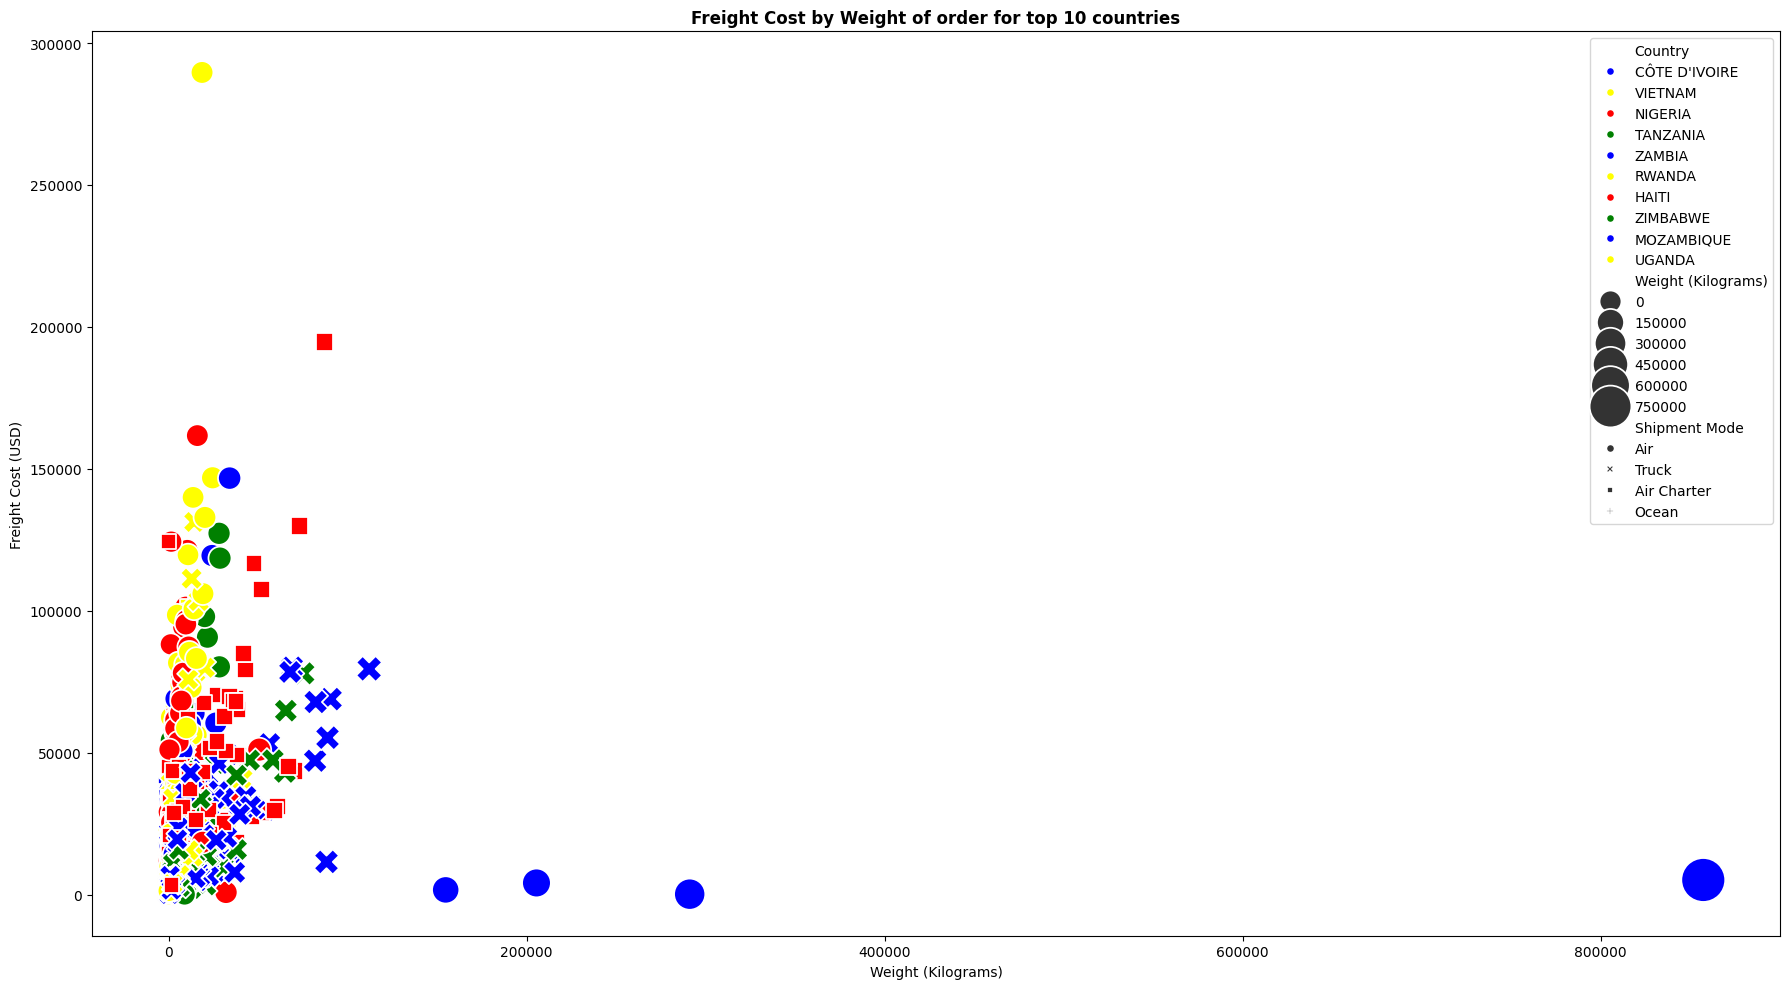

In [ ]:
top_10_countries = fed_ex['Country'].value_counts().nlargest(10).index

top_10_data = fed_ex[fed_ex['Country'].isin(top_10_countries)]


fig, ax = plt.subplots(figsize=(18, 10))
sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', hue='Country',  size='Weight (Kilograms)',
                style='Shipment Mode',  sizes=(250, 1000),  data=top_10_data,  palette=palette, ax=ax)

plt.title("Freight Cost by Weight of order for top 10 countries",weight='bold')
plt.tight_layout()
plt.show()

**The scatter plot illustrates the relationship between freight cost
and weight for a set of shipments across different modes and top 10 countries.
The general trend is that as the weight of a shipment increases, so does the freight cost.
However, there is also a degree of variability
around this trend, as evidenced by the scatter of the data points.
This suggests that factors other than weight, such as distance,
shipment mode, or country, may also influence freight costs.**

#### **2.Line Item Value in comaprison with Freight Cost by Vendor and Shipment Mode**

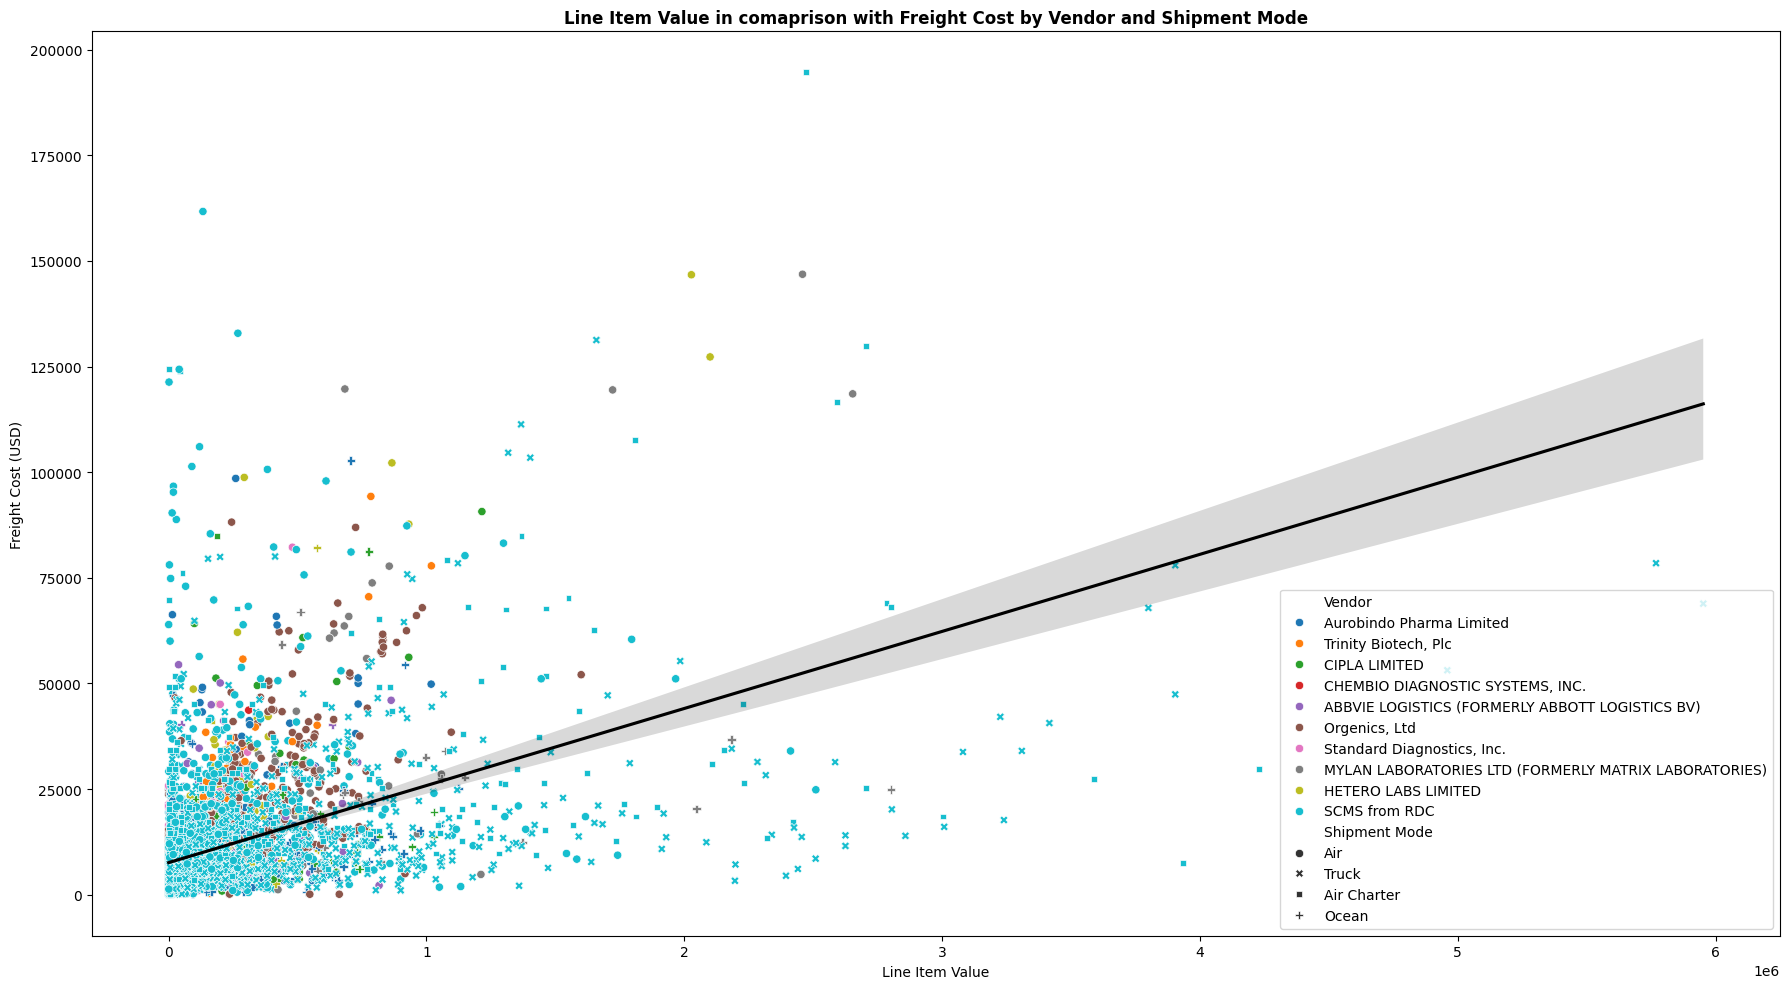

In [ ]:
top_vendor = fed_ex['Vendor'].value_counts().nlargest(10).index

top_vendor_data = fed_ex[fed_ex['Vendor'].isin(top_vendor)]

fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.scatterplot(x='Line Item Value',
                y='Freight Cost (USD)',
                style ='Shipment Mode',
                hue='Vendor',
                data=top_vendor_data,
                ax=ax)

sns.regplot( x='Line Item Value',
          y='Freight Cost (USD)',
          data=fed_ex,
          scatter=False,
          ax=ax,
          color='black')
plt.title('Line Item Value in comaprison with Freight Cost by Vendor and Shipment Mode',weight='bold')
plt.tight_layout()
plt.show()


**The scatter plot illustrates the relationship between the line item value and freight cost for a set of shipments,
considering the effects of vendor and shipment mode.
The general trend is that as the line item value increases,
so does the freight cost. However, there is also a degree of variability around this trend,
as evidenced by the scatter of the data points.
This suggests that factors other than line item value, such as vendor,
shipment mode, or other variables not included in the plot, may also influence freight costs.**

#### **3.Freight Cost by Shipment Mode and means of Fulfillment**

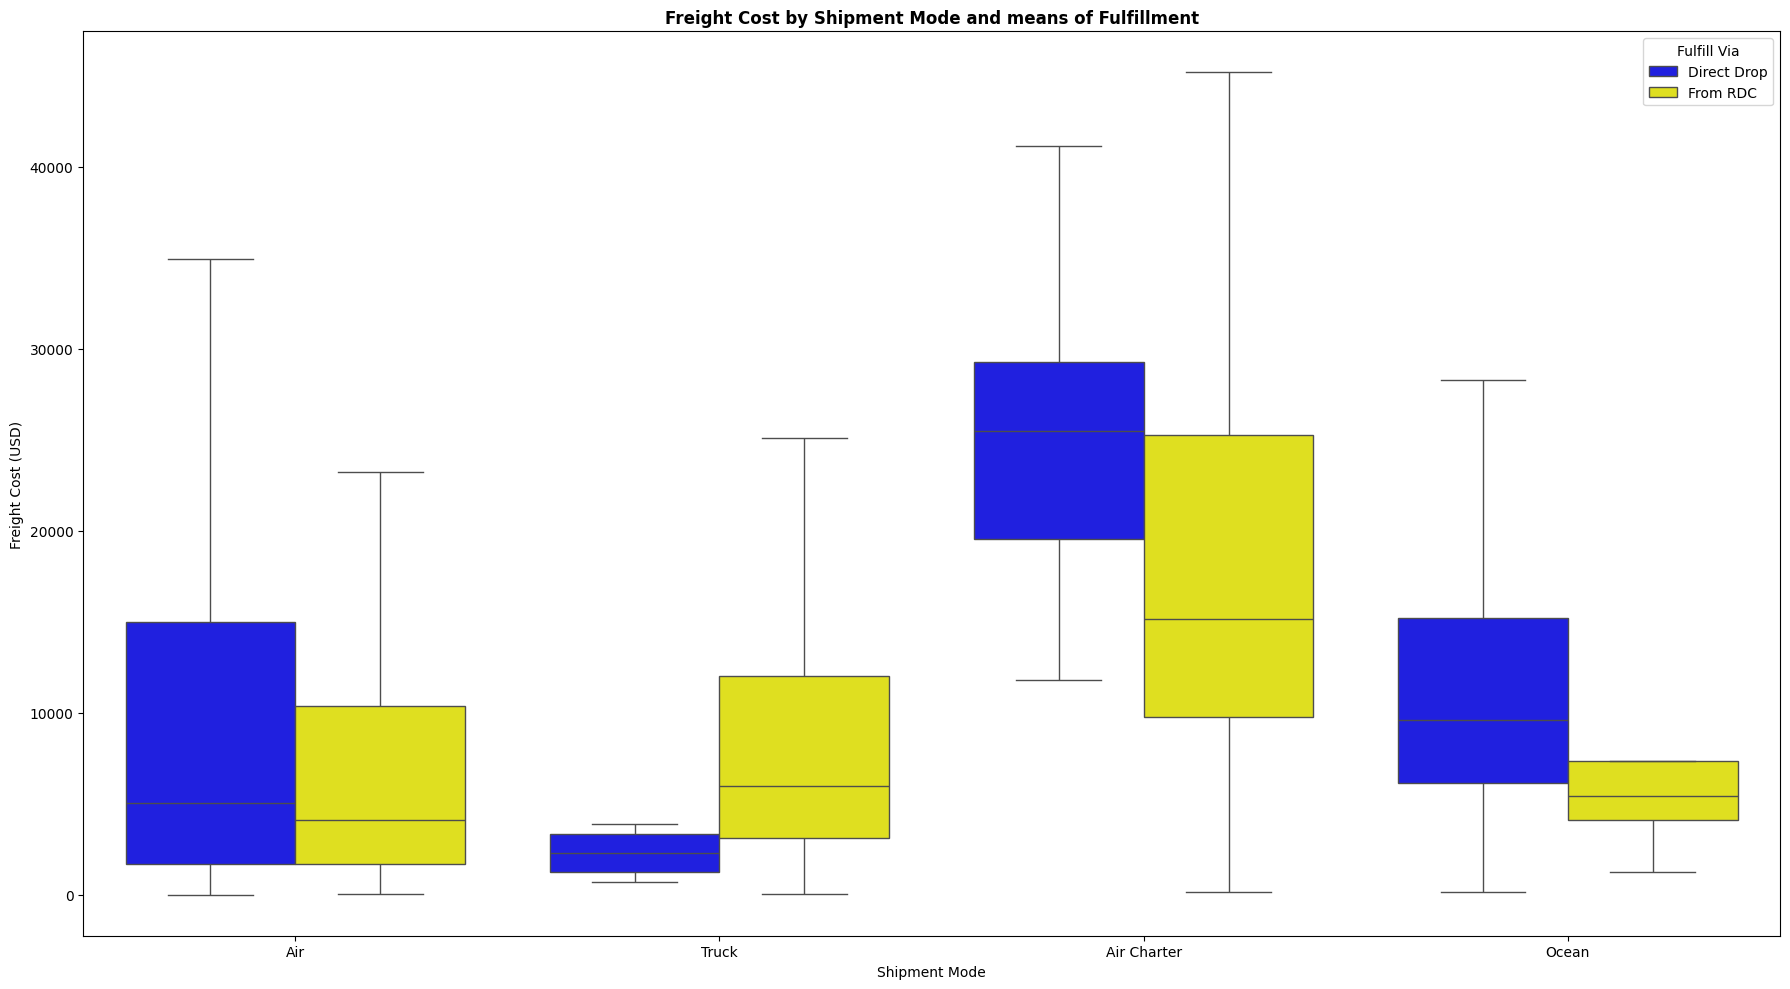

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (18,10))
sns.boxplot(
    x='Shipment Mode',
    y='Freight Cost (USD)',
    hue='Fulfill Via',  # Add segmentation by fulfill method
    data=fed_ex,  # Replace with your dataset
    ax=ax,
    palette=palette,
    showfliers = False
)
plt.title("Freight Cost by Shipment Mode and means of Fulfillment",weight='bold')
plt.tight_layout()
plt.show()

**The box plot compares the distribution of freight costs across different shipment modes,
fulfillment vias.
It shows that FedEx Air Charter has the highest median freight cost fullfilled via Direct drop,
followed by FedEx Air Ocean mode.
The interquartile range (IQR) for FedEx Truck is the smallest,
indicating a more consistent freight cost compared to other modes.
The outliers for FedEx Ground and FedEx Express suggest significantly
higher or lower freight costs in one or more months.**

#### **Correlation Heatmap**

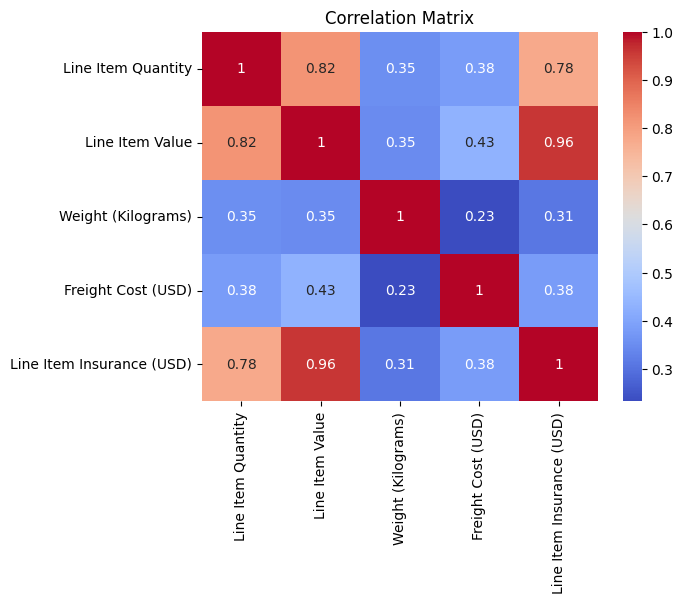

In [ ]:
numerical_fed_ex = fed_ex[['Line Item Quantity','Line Item Value','Weight (Kilograms)','Freight Cost (USD)', 'Line Item Insurance (USD)']]
corr = numerical_fed_ex.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The correlation heatmap reveals strong positive
relationships between line item quantity and line item value,
and a moderate positive correlation between weight and freight cost.
Weaker positive correlations exist between line item insurance and freight cost.
These findings suggest that the quantity and value of items,
as well as weight, are significant factors influencing freight costs.**

#### **Pair Plot**

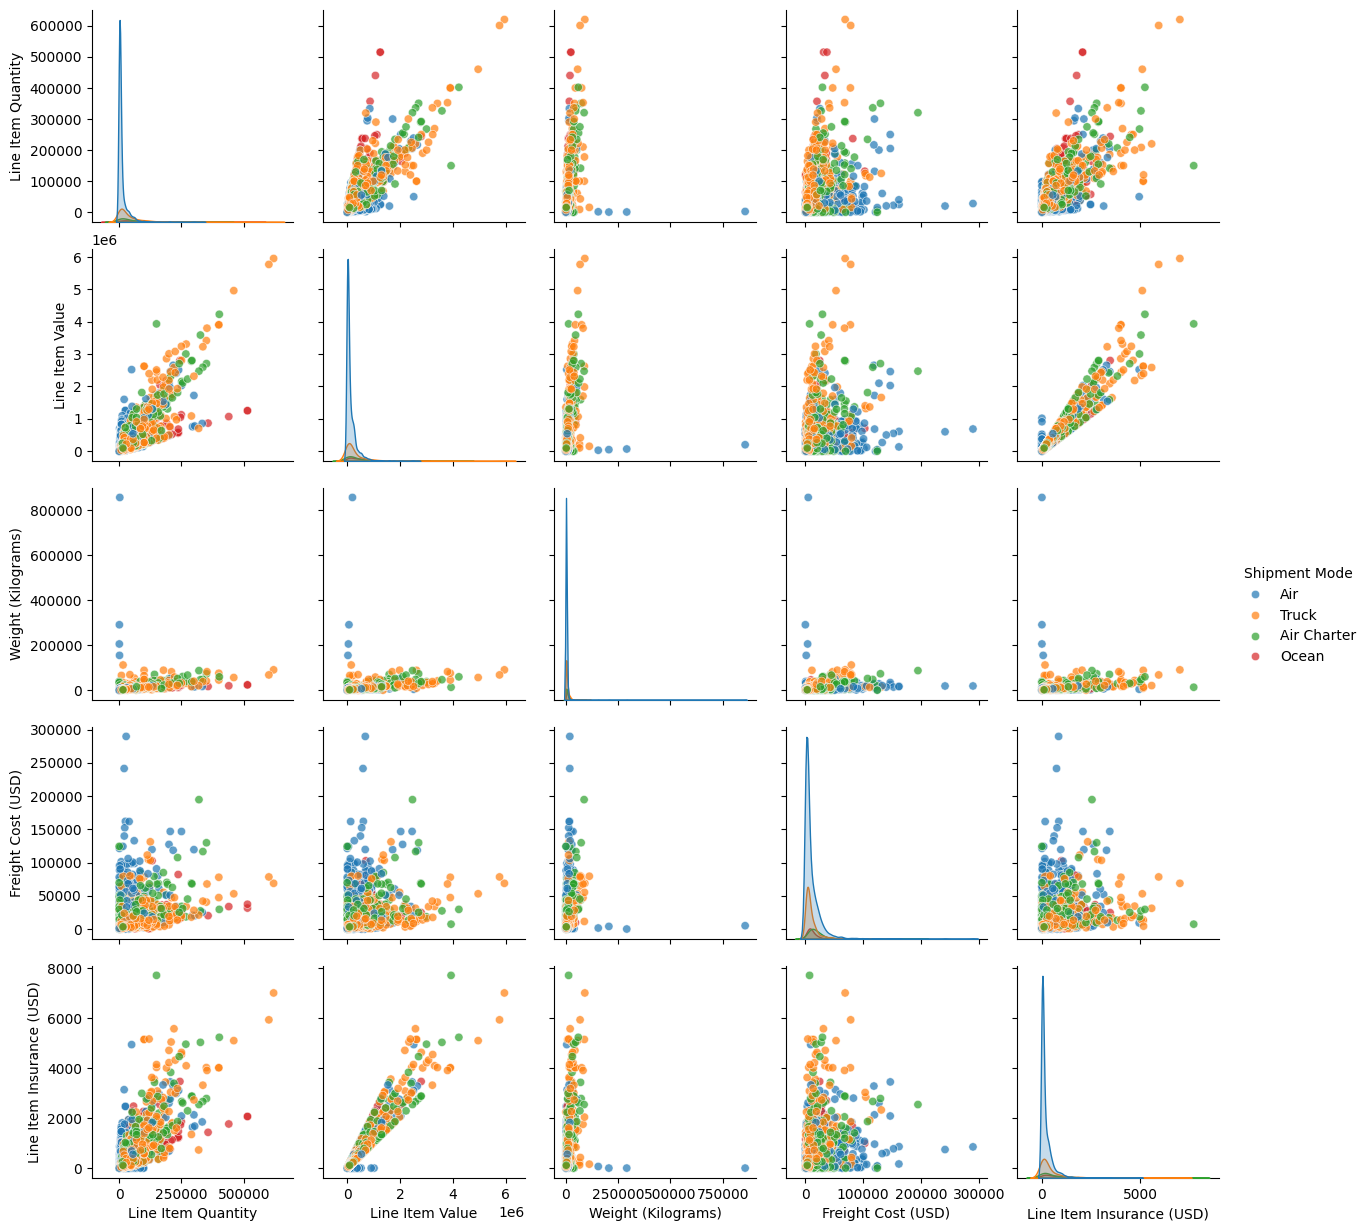

In [ ]:
#prepareing the dataset for displaying pair plot.
df_pair_plot = fed_ex[['Line Item Quantity','Line Item Value','Weight (Kilograms)','Freight Cost (USD)','Line Item Insurance (USD)','Shipment Mode']]

sns.pairplot(data=df_pair_plot,hue='Shipment Mode', diag_kind='kde', plot_kws={'alpha': 0.7})

**This pair plot reveals relationships among line item value, weight, freight cost,
and insurance costs across different shipment modes. Patterns can help identify
which factors most influence freight costs in logistics operations.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


**The solution to optimize FedEx Logistics' operations lies in leveraging data insights to achieve a balance between freight costs and delivery efficiency.

1.Analysis of shipment modes reveals that air charter transport incurs significantly higher freight costs, whereas conventional air transport, with comparatively lower costs, provides faster delivery, making it ideal for time-sensitive and high-value shipments. For heavier or low-value shipments, prioritizing sea or ground transport can effectively **minimize costs**.

2.Identifying key vendors and countries with the highest shipment volumes **facilitates better resource allocation**.This insights helps in better decision making regarding **warehouse placement,workforce distribuition and cost optimization.**

3.By addressing delivery delays through improved tracking systems, direct delivery options, and enhanced vendor management can significantly boost **on-time performance, reduce operational costs, and enhance overall customer satisfaction**.**

# **Conclusion**

**This detailed analysis equips FedEx Logistics with valuable insights into their operations. By pinpointing the key drivers of costs, delays, and vendor performance, the company can implement strategic improvements to optimize its global supply chain. The combination of univariate, bivariate, and multivariate analyses provides a comprehensive understanding of the logistics ecosystem, empowering FedEx to enhance operational efficiency, lower costs, and elevate customer satisfaction across its network.**